### Project for W261

**Goal** Predict click-through rate from features

In [5]:
import pyspark

In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('abc').getOrCreate()

In [7]:
import sklearn as skl

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

import random

import pandas as pd
import seaborn as sns

import numpy as np

### Test Spark is working and can read the file

In [14]:
sc = spark.sparkContext

In [15]:
rdd = sc.parallelize(range(100))

In [16]:
rdd.take(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Generate a small sample from the training data

In [17]:
generate_sample = False


In [18]:
if generate_sample:
    with open('data/train.txt', 'r') as infile, open('data/sample.txt', 'w') as outfile:
        for line in infile:
            n = random.randint(0, 100)
            if n == 0:
                outfile.write(line)        

In [24]:
 with open('data/sample.txt', 'r') as infile, open('data/small_sample.txt', 'w') as outfile:
        for n, line in zip(range(100), infile):
            outfile.write(line)

In [19]:
test_rdd = sc.textFile('data/test.txt')

In [20]:
train_rdd = sc.textFile('data/train.txt')

In [21]:
sample_rdd = sc.textFile('data/sample.txt')

In [25]:
small_sample_rdd = sc.textFile('data/small_sample.txt')

In [22]:
sample_rdd.take(10)

['1\t3\t1697\t3\t1\t27\t0\t4\t45\t144\t2\t3\t\t0\t87552397\t207b2d81\td52980aa\tb66d15e3\t4cf72387\t6f6d9be8\t283d5555\t0b153874\ta73ee510\t3b08e48b\t3d5fb018\tb519c595\t94172618\t64c94865\t11b2ae92\t7c8ae841\te5ba7672\t395856b0\t21ddcdc9\tb1252a9d\t605305ee\t\t32c7478e\tf090fae7\t001f3601\tcdc744c1',
 '0\t0\t1\t7\t0\t3587\t4\t35\t2\t10\t0\t8\t0\t1\t05db9164\t404660bb\tf1397040\t09003f7b\t25c83c98\t7e0ccccf\t1c86e0eb\tc8ddd494\ta73ee510\tda87807c\t755e4a50\t0cdb9a18\t5978055e\t07d13a8f\t633f1661\t82708081\te5ba7672\t4b17f8a2\t21ddcdc9\t5840adea\t4c14738f\t\t32c7478e\ta86c0565\tf0f449dd\t984e0db0',
 '0\t1\t0\t\t9\t27\t9\t1\t10\t9\t1\t1\t\t9\t68fd1e64\td833535f\t77f2f2e5\td16679b9\t384874ce\tfe6b92e5\t52283d1c\t0b153874\ta73ee510\t299aecf1\te51ddf94\t9f32b866\t3516f6e6\tb28479f6\ta66dcf27\t31ca40b6\td4bb7bd8\t7b49e3d2\t\t\tdfcfc3fa\t\t3a171ecb\taee52b6f\t\t',
 '0\t\t8\t\t2\t30617\t\t0\t5\t40\t\t0\t\t2\t05db9164\td833535f\t77f2f2e5\td16679b9\t4cf72387\t7e0ccccf\tba000501\t1f89b562\ta73ee5

In [39]:
sample_rdd.count()

454529

In [43]:
sample_rdd.map(lambda x: x.split('\t'))\
.map(lambda x: (int(x[0]), 1))\
.reduceByKey(lambda x, y: x+y).collect()

[(0, 338426), (1, 116103)]

In [44]:
!ls -l data/


total 33834552
-rw-r--r--  1 anuyadav  staff   4576820670 Jun 21  2018 dac.tar.gz
-rw-r--r--  1 anuyadav  staff         1927 Aug 22  2014 readme.txt
-rw-r--r--  1 anuyadav  staff    110529428 Nov 15 19:19 sample.txt
-rw-r--r--  1 anuyadav  staff   1460246311 Aug 22  2014 test.txt
-rw-r--r--  1 anuyadav  staff  11147184845 May 12  2014 train.txt


In [49]:
sample_df = pd.read_table('data/sample.txt', header=None)

In [50]:
sample_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1,3.0,1697,3.0,1.0,27.0,0.0,4.0,45.0,144.0,...,e5ba7672,395856b0,21ddcdc9,b1252a9d,605305ee,NaN,32c7478e,f090fae7,001f3601,cdc744c1
1,0,0.0,1,7.0,0.0,3587.0,4.0,35.0,2.0,10.0,...,e5ba7672,4b17f8a2,21ddcdc9,5840adea,4c14738f,NaN,32c7478e,a86c0565,f0f449dd,984e0db0
2,0,1.0,0,NaN,9.0,27.0,9.0,1.0,10.0,9.0,...,d4bb7bd8,7b49e3d2,NaN,NaN,dfcfc3fa,NaN,3a171ecb,aee52b6f,NaN,NaN
3,0,NaN,8,NaN,2.0,30617.0,NaN,0.0,5.0,40.0,...,d4bb7bd8,281769c2,NaN,NaN,dfcfc3fa,NaN,3a171ecb,aee52b6f,NaN,NaN
4,0,0.0,307,4.0,4.0,2826.0,4.0,4.0,4.0,20.0,...,07c540c4,e261f8d8,21ddcdc9,5840adea,1380864e,NaN,3a171ecb,be2f0db5,47907db5,68d9ada1


In [56]:
sample_df.loc[:,0].value_counts()

0    338426
1    116103
Name: 0, dtype: int64

In [162]:
# Some features are integer and some are categorical
# Separate out
integer_features = range(1, 14)
cat_featrues = range(14, 14+26)

#### Correlation matrix

In [168]:
sample_df_int= sample_df.loc[:,integer_features]

In [169]:
corr_mat = sample_df_int.corr()

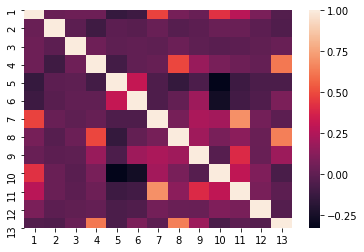

In [172]:
sns.heatmap(corr_mat)

In [173]:
# Correlation with target
sample_df_int.corrwith(sample_df.loc[:,0])

1     0.096532
2     0.043933
3     0.013002
4    -0.051974
5    -0.080665
6    -0.104261
7     0.086208
8    -0.027183
9     0.022742
10    0.172569
11    0.156353
12    0.094621
13   -0.085857
dtype: float64

In [163]:
sample_df.loc[:,integer_features].isna().sum()/len(sample_df)
# Features 1, 10 seem to be the same missing values
# Lots of values missing (over 20%) values in 1, 3, 4, 6, 10, 12, 13

1     0.454534
2     0.000000
3     0.214299
4     0.216745
5     0.025684
6     0.222839
7     0.042930
8     0.000462
9     0.042930
10    0.454534
11    0.042930
12    0.764594
13    0.216745
dtype: float64

In [65]:
import matplotlib

In [73]:
sample_df_int = sample_df.loc[:,integer_features]

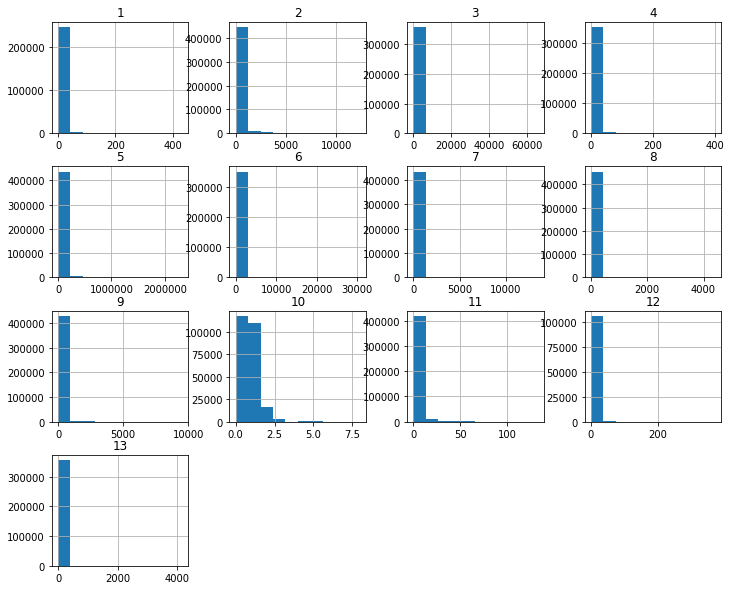

In [75]:
axs = sample_df_int.hist(figsize=(12, 10))

In [76]:
sample_df_cat = sample_df.loc[:,cat_featrues]

In [164]:
# Number of unique values in the dataframe
# Keep only features with fewer than 30 values
low_cat_values = sample_df_cat.nunique() < 30#/len(sample_df_cat)

In [145]:
cat_features_final = list(low_cat_values.index[low_cat_values])

In [98]:
def convert_str(x):
    try:
        return int(x, base=16)
    except:
        return 0

In [147]:
y = sample_df[0]
X = sample_df[list(integer_features)+cat_features_final]

In [148]:
X[cat_features_final].head().applymap(convert_str)

,19,22,27,30,33,35,36
0,1869454312,2805916944,1690912869,3854202482,2972002973,0,851920782
1,2114768079,2805916944,131152527,3854202482,1480633834,0,851920782
2,4268462821,2805916944,2995026422,3569056728,0,0,974593739
3,2114768079,2805916944,131152527,3569056728,0,0,974593739
4,4268462821,2805916944,131152527,130367684,1480633834,0,974593739


In [149]:
X.loc[:,cat_features_final] = X[cat_features_final].applymap(convert_str)

/Users/anuyadav/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [150]:
X.loc[:,integer_features] = X[integer_features].fillna(0)

### Try a logistic regresssion

Run training on just integer features and categorical features with a few unique values.
Run alogistic regression to see what we get

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,integer_features], y)

In [152]:
model = LogisticRegression()

In [153]:
model.fit(X_train, y_train)

/Users/anuyadav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anuyadav/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
y_pred = model.predict(X_test)

## Accuracy and precision and recall

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [156]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
accuracy_score(y_test, y_pred)

0.7417123546856987

In [158]:
recall_score(y_test, y_pred)

0.06164313309856747

In [159]:
precision_score(y_test, y_pred)

0.4863771243593202

In [129]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
222303,0.0,1,39.0,22.0,9082.0,109.0,4.0,40.0,109.0,0.0,...,3854202482,3560079444,0,0,1360682,0,1111468905,991444060,0,0
136777,0.0,0,1.0,0.0,1360.0,9.0,0.0,2.0,5.0,0.0,...,3569056728,1224985920,0,0,2795270511,0,974593739,206925917,0,0
102189,0.0,268,0.0,1.0,1879.0,7.0,1.0,1.0,5.0,0.0,...,3854202482,2856508582,0,0,1811940698,3386122794,851920782,4101523060,0,0
292553,1.0,-1,2.0,25.0,15.0,14.0,1.0,9.0,61.0,1.0,...,881205885,1875397627,0,0,1327145567,2905629419,1111468905,3738479305,0,0
133845,0.0,1,30.0,7.0,25649.0,0.0,0.0,29.0,40.0,0.0,...,3854202482,1525511222,1197784951,2757290579,3157861902,0,851920782,1071331371,3904386055,1238795398


In [95]:
int('3a490508', base=16)

977863944

In [ ]:
model.

In [68]:
import matplotlib.pyplot as plt

In [72]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [54]:
sample_df.columns = ['target'] + sample_df.columns.values()[1:]

TypeError: 'numpy.ndarray' object is not callable

In [55]:
sample_df.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

### Implementing the factor machine algorithm 

Algorithm seeks to minimize 

$$L(w, x) = \sum_{i=1}^N \log(1 + \exp(-y_i\phi(w, x_i)) + \lambda\|w\|^2$$

Idea to parallelize using pyspark, so we need to re-write the gradient descient step. For simpliciity assume that $\phi(w, x) = w^Tx$ (linear). 

#### Calculations

$$\frac{\partial L}{\partial w_k} =\sum_{i=1}^N \frac{-y_ix_{i,k}\exp(-y_i w^Tx) }{1+\exp(-y_i w^Tx_i} + \lambda w_k$$

This can be parallelized since each part of the sum depends on one data point. The gradient update is

$$\nabla L = \sum_{i=1}^N y_i\frac{u_i}{1+ u_i}x_i - \lambda w$$, where $u_i = \exp(-y_i w^Tx)$

Assume that the RDD rows look like $(y, x_1, \ldots, x_p)$ then in the first map step we compute the gradient

$(x_1, x_2, \ldots, x_p) \times yu/(1+u)$ 

We then reduce this with a sum and subtract the $\lambda w$ to get the new $w$

#### Testing out algo

In [59]:
reg_c = 1

In [64]:
w = np.zeros((1,13), dtype=float)

In [65]:
grad_1 = small_sample_rdd.map(convert_features).map(lambda x, w=w: compute_gradient(x, w)).sum() #x, y

In [66]:
grad = grad_1 + reg_c*w

In [67]:
w_new = w - learning_rate*grad

In [68]:
w_new

array([[-2.10000e+00, -3.31100e+02, -6.95000e+00, -7.35000e+00,
        -4.44215e+03, -1.54000e+01, -1.58000e+01, -1.33000e+01,
        -9.90500e+01, -7.50000e-01, -3.25000e+00, -5.00000e-02,
        -4.55000e+00]])

In [89]:
first_val = rdd.first()

In [145]:
compute_ranges(rdd)

(array([ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.]),
 array([1.00000e+00, 6.90000e+01, 1.94500e+03, 2.34000e+02, 4.20000e+01,
        7.35072e+05, 8.61000e+02, 3.19000e+02, 4.90000e+01, 9.19000e+02,
        3.00000e+00, 2.60000e+01, 1.00000e+00, 7.20000e+01]))

In [57]:
def convert_features(x):
    row = x.split('\t')
    row[0] = int(row[0])
    for i in range(1, 14):
        try:
            row[i] = int(row[i])
        except ValueError:
            row[i] = 0
#     for i in range(14, 14 + 26):
#         try:
#             row[i] = int(row[i], base=16)
#         except ValueError:
#             row[i] = 0
    return row[:14]

In [101]:
rdd = small_sample_rdd.map(convert_features)

In [104]:
from pyspark import AccumulatorParam

In [105]:
class FloatAccumParam(AccumulatorParam):
    def zero(self, v=0.0):
        return 0.0

    def addInPlace(self, v1, v2):
        return v1 + v2

In [126]:
class FloatArrayParam(AccumulatorParam):
    def zero(self, v):
        return np.zeros(np.array(v).shape, dtype=float)

    def addInPlace(self, v1, v2):
        return np.array(v1) + np.array(v2)

In [120]:
class FloatMinArrayParam(FloatArrayParam):
    def addInPlace(self, v1, v2):
        return np.array([min(x, y) for x, y in zip(v1, v2)])

In [121]:
class FloatMaxArrayParam(FloatArrayParam):
    def addInPlace(self, v1, v2):
        return np.array([max(x, y) for x, y in zip(v1, v2)])

In [130]:
ac = sc.accumulator([0.0, 0.3], FloatMinArrayParam())

In [132]:
ac

Accumulator<id=5, value=[0.0, 0.3]>

In [135]:
ac += [-1,4]

In [136]:
ac

Accumulator<id=5, value=[-1.   0.3]>

In [139]:
def update_accs(x, min_ac, max_ac):
    min_ac += x
    max_ac += x

In [144]:
def compute_ranges(rdd):
    first = rdd.first()
    min_ac = sc.accumulator(first, FloatMinArrayParam())
    max_ac = sc.accumulator(first, FloatMaxArrayParam())
    rdd.foreach(lambda x: update_accs(x, min_ac, max_ac) )
    return min_ac.value, max_ac.value

In [146]:
def scale_feature(rdd):
    min_v, max_v = compute_ranges(rdd)
    return rdd.map(lambda x: (x - min_v)/(max_v - min_v))

In [156]:
rdd_scaled = scale_feature(rdd)

In [147]:
def compute_gradient(row, w):
    y = row[0]
    x = np.array(row[1:])
    u = np.exp(-y * np.dot(w, x))
    return y*u/(1+u)*x

In [152]:
def run_logistic_regression(rdd, niters=10, learning_rate=0.1, reg_c=1):
    first = rdd.first()
    p = len(first) - 1
    w = np.zeros((1,p), dtype=float)
    for i in range(niters):
        grad_1 = rdd.map(lambda x, w=w: compute_gradient(x, w)).sum()
        grad = grad_1 + reg_c*w
        print(grad)
        w = w - learning_rate*grad
        print(w)
        
    return w

In [157]:
w_tes = run_logistic_regression(rdd_scaled, niters=10)

[[0.30434783 1.70760534 0.29700855 1.75       0.0604315  0.17886179
  0.49529781 2.71428571 1.07780196 2.5        1.25       0.5
  0.63194444]]
[[-0.03043478 -0.17076053 -0.02970085 -0.175      -0.00604315 -0.01788618
  -0.04952978 -0.27142857 -0.1077802  -0.25       -0.125      -0.05
  -0.06319444]]
[[0.31941127 1.78065843 0.30726083 1.83036917 0.05714643 0.17382879
  0.48644136 2.91294916 1.11588095 2.60184128 1.26529027 0.51844958
  0.63483226]]
[[-0.06237591 -0.34882638 -0.06042694 -0.35803692 -0.01175779 -0.03526906
  -0.09817392 -0.56272349 -0.21936829 -0.51018413 -0.25152903 -0.10184496
  -0.12667767]]
[[0.33188613 1.83356972 0.31540403 1.89831391 0.05427092 0.16942918
  0.47816313 3.06970871 1.14592857 2.68158618 1.2762797  0.53563478
  0.63823012]]
[[-0.09556452 -0.53218335 -0.09196734 -0.54786831 -0.01718488 -0.05221198
  -0.14599023 -0.86969436 -0.33396115 -0.77834275 -0.379157   -0.15540844
  -0.19050068]]
[[0.33869108 1.84907175 0.31856054 1.93687553 0.05169727 0.16500132
